<h2>In the previous file we got the data we needed. We will use this file to some classic exploratory analysis and detect potential outliers (if any). By doing that we will additionaly refilter the dataset and eventually proceeding with applying the ML model </h2>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('dataUserLevel.csv')
print(len(df))

4372


In [4]:
df.head()

,Id,Frequency,Recency,Lifetime,MonetaryValue
0,17850.0,35,3836,3907,5288.63
1,13047.0,18,3565,3907,3079.10
2,12583.0,18,3536,3907,7187.34
3,13748.0,5,3629,3907,948.25
4,15100.0,6,3864,3907,635.10


In [5]:
df.describe()

,Id,Frequency,Recency,Lifetime,MonetaryValue
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,5.075480,3625.581199,3759.304209,1898.459701
std,1722.390705,9.338754,100.772139,118.384168,8219.345141
min,12346.000000,1.000000,3534.000000,3534.000000,-4287.630000
25%,13812.750000,1.000000,3550.000000,3649.000000,293.362500
50%,15300.500000,3.000000,3584.000000,3787.000000,648.075000
75%,16778.250000,5.000000,3677.000000,3865.000000,1611.725000
max,18287.000000,248.000000,3907.000000,3907.000000,279489.020000


<h3> In order to follow the practice out there we will need to calculate IQR for each column (obviously for not the ID one - but let's just keep in mind that actually sometimes ID reveals important info for example and can be a composite key - in this case let's assume it doesn't). </h3>


In [8]:
firstFreq = np.percentile(df.Frequency, 25)
thirdFreq = np.percentile(df.Frequency, 75)
IQRFreq = thirdFreq - firstFreq

lowFreq = firstFreq - 1.5*IQRFreq
highFreq = thirdFreq + 1.5*IQRFreq


firstRec = np.percentile(df.Recency, 25)
thirdRec = np.percentile(df.Recency, 75)
IQRRec = thirdRec - firstRec

lowRec = firstRec - 1.5*IQRRec
highRec = thirdRec + 1.5*IQRRec

firstLife = np.percentile(df.Lifetime, 25)
thirdLife = np.percentile(df.Lifetime, 75)
IQRLife = thirdLife - firstLife

lowLife = firstLife - 1.5*IQRLife
highLife = thirdLife + 1.5*IQRLife


firstMonVal = np.percentile(df.MonetaryValue, 25)
thirdMonVal = np.percentile(df.MonetaryValue, 75)
IQRMonVal = thirdMonVal - firstMonVal

lowMonVal = firstMonVal - 1.5*IQRMonVal
highMonVal = thirdMonVal + 1.5*IQRMonVal


In [9]:
filteredDict = {'Id':[],'Frequency':[],'Recency':[],'Lifetime':[],'MonetaryValue':[]}
userIds = df['Id'].tolist()

for i in range(len(userIds)):
    if lowFreq <= df.Frequency.iloc[i] <= highFreq :
        if lowRec <= df.Recency.iloc[i] <= highRec :
            if lowLife <= df.Lifetime.iloc[i] <= highLife :
                if lowMonVal <= df.MonetaryValue.iloc[i] <= highMonVal:
                    filteredDict['Id'].append(userIds[i])
                    filteredDict['Frequency'].append(df.Frequency.iloc[i])
                    filteredDict['Lifetime'].append(df.Lifetime.iloc[i])
                    filteredDict['MonetaryValue'].append(df.MonetaryValue.iloc[i])
                    filteredDict['Recency'].append(df.Recency.iloc[i])
        

In [11]:
filteredDf = pd.DataFrame.from_dict(filteredDict)
filteredDf.head()


,Id,Frequency,Recency,Lifetime,MonetaryValue
0,13748.0,5,3629,3907,948.25
1,15100.0,6,3864,3907,635.10
2,16098.0,7,3621,3907,2005.63
3,17420.0,3,3584,3907,598.83
4,16250.0,2,3795,3907,389.44


In [12]:
print(len(filteredDf))

3686


In [13]:
filteredDf.to_csv('modelDataset.csv', encoding='utf-8', index=False)

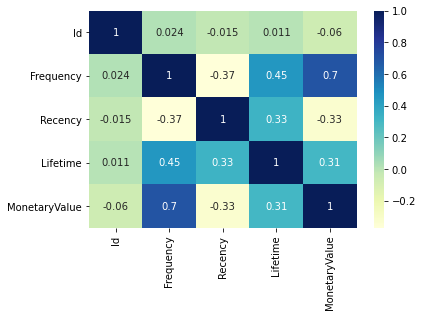

In [14]:
# plotting correlation heatmap
dataplot = sns.heatmap(filteredDf.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()